In [1]:
# Nice to have and only here as a reference until moved to its instructional home :)
#export CUDNN_PATH=$(dirname $(python -c "import nvidia.cudnn; print(nvidia.cudnn.__file__)"))
#export SITE_PACKAGES_PATH=$(python -c "import site; print(site.getsitepackages()[0])")
#export LD_LIBRARY_PATH=$CUDNN_PATH/lib:$SITE_PACKAGES_PATH/tensorrt_libs/:$LD_LIBRARY_PATH

In [2]:
!conda list

# packages in environment at /home/flaniganp/mambaforge/envs/torch_exercise_3:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
anyio                     4.3.0                    pypi_0    pypi
argon2-cffi               23.1.0                   pypi_0    pypi
argon2-cffi-bindings      21.2.0                   pypi_0    pypi
arrow                     1.3.0                    pypi_0    pypi
asttokens                 2.4.1                    pypi_0    pypi
async-lru                 2.0.4                    pypi_0    pypi
attrs                     23.2.0                   pypi_0    pypi
babel                     2.14.0                   pypi_0    pypi
beautifulsoup4            4.12.3                   pypi_0    pypi
bleach                    6.1.0                    pypi_0    pypi
bzip2                     1.0.8               

In [3]:
# The 'matplotlib.pyplot' is a collection of functions in the 'matplotlib' library that make matplotlib work like MATLAB.
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure,
# plots some lines in a plotting area, decorates the plot with labels, etc. 'plt' is a commonly used shorthand alias
# for 'matplotlib.pyplot'. This allows you to access matplotlib's plotting functions with shorter syntax - for example,
# you can type 'plt.plot()' instead of 'matplotlib.pyplot.plot()'. This import is essential for data visualization,
# allowing you to create a wide variety of static, animated, and interactive plots and charts in Python.
import matplotlib.pyplot as plt

# The os module in Python provides a way of using operating system dependent functionality. It allows you to interface
# with the underlying operating system that Python is running on – be it Windows, Mac or Linux. You can use the os module
# to handle file and directory paths, create folders, list contents of a directory, manage environment variables, execute
# shell commands, and more.
import os

# A standard Python module for generating random numbers.
import random

# The 'requests' library is the de facto standard for making HTTP requests in Python. It abstracts the complexities of
# making requests behind a beautiful, simple API, so that you can focus on interacting with services and consuming data
# in your application. It's used here for downloading the dataset from a given URL.
import requests

# Regular Expressions
# 1. search: This function is used to perform a search for a pattern in a string and returns a match object if the
# pattern is found, otherwise None. It's particularly useful for string pattern matching and extracting specific
# segments from text.
from re import search

# This line imports the 'check_output' function from the 'subprocess' module in Python. The 'subprocess' module
# allows you to spawn new processes, connect to their input/output/error pipes, and obtain their return codes. This
# module is intended to replace older modules and functions like os.system and os.spawn*.
# Key aspects of 'check_output':
# 1. **Process Execution**: The 'check_output' function is used to run a command in the subprocess/external process and
#    capture its output. This is especially useful for running system commands and capturing their output directly
#    within a Python script.
# 2. **Return Output**: It returns the output of the command, making it available to the Python environment. If the
#    called command results in an error (non-zero exit status), it raises a CalledProcessError.
# 3. **Use Cases**: Common use cases include executing a shell command, reading the output of a command, automating
#    scripts that interact with the command line, and integrating external tools into a Python workflow.

# Example Usage:
# Suppose you want to capture the output of the 'ls' command in a Unix/Linux system. You can use 'check_output' like
# this:
# output = check_output(['ls', '-l'])
from subprocess import check_output

# Importing the PyTorch library, known as `torch`, a powerful and widely used open-source machine learning framework.
# PyTorch provides tools and libraries for designing, training, and deploying deep learning models with ease. It's
# particularly known for its flexibility, user-friendly interface, and dynamic computational graph that allows for
# adaptive and efficient deep learning development. By importing `torch`, you gain access to a vast range of
# functionalities for handling multi-dimensional arrays (tensors), performing complex mathematical operations,
# and utilizing GPUs for accelerated computing. This makes it an indispensable tool for both researchers and
# developers in the field of artificial intelligence.
import torch

# nn from torch: Provides the building blocks for creating neural networks, including layers, activation functions,
# and loss functions. It's a foundational module for defining and assembling neural network architectures.
import torch.nn as nn

# nn.functional from torch: Contains functions like activation functions, loss functions, and convolution operations.
# These functions are stateless, providing a functional interface to operations that can be applied to tensors.
import torch.nn.functional as F

# optim from torch: Implements various optimization algorithms for training neural networks, including SGD, Adam,
# and RMSprop. These algorithms are used to update the weights of the network during training.
import torch.optim as optim

# Imports the quantize_dynamic function from PyTorch's quantization submodule. This function is used for dynamically 
# quantizing the weights of specified layers (e.g., Linear, LSTM) in a trained PyTorch model to int8 format, reducing
# model size and potentially increasing inference speed without needing input data for calibration.
from torch.quantization import quantize_dynamic

# A toolbox for computer vision tasks in Python. It includes:
# 1. 'datasets' for accessing a variety of pre-prepared image collections for training models.
# 2. 'transforms' for editing and adjusting images (like resizing or color changes) to improve model learning.
import torchvision

# This imports the DataLoader class from PyTorch's utility functions. DataLoader is essential for loading the data and
# feeding it into the network in batches. It offers the ability to shuffle the data, load it in parallel using
# multiprocessing, and more, thus providing an efficient way to iterate over data.
from torch.utils.data import DataLoader

# The 'zipfile' module in Python is used for reading and writing ZIP files. It allows you to create, read, write,
# append, and list ZIP files. In this context, it's used to extract the downloaded dataset, which is assumed to be in a
# ZIP format, into a designated directory for further processing and use in the training process.
import zipfile

In [4]:
# This function `print_gpu_info` is designed to display detailed information about the available GPUs on the system.
# It utilizes TensorFlow's `device_lib.list_local_devices()` method to enumerate all computing devices recognized by
# TensorFlow. For each device identified as a GPU, the function extracts and prints relevant details including the GPU's
# ID, name, memory limit (converted to megabytes), and compute capability. The extraction of GPU information involves
# parsing the device's description string using regular expressions to find specific pieces of information. This
# function can be particularly useful for debugging or for setting up configurations in environments with multiple GPUs,
# ensuring that TensorFlow is utilizing the GPUs as expected.

def print_gpu_info():
    # Undocumented Method
    # https://stackoverflow.com/questions/38559755/how-to-get-current-available-gpus-in-tensorflow
    # Get the list of all devices
    devices = device_lib.list_local_devices()

    for device in devices:
        if device.device_type == 'GPU':
            # Extract the physical device description
            desc = device.physical_device_desc

            # Use regular expressions to extract the required information
            gpu_id_match = search(r'device: (\d+)', desc)
            name_match = search(r'name: (.*?),', desc)
            compute_capability_match = search(r'compute capability: (\d+\.\d+)', desc)

            if gpu_id_match and name_match and compute_capability_match:
                gpu_id = gpu_id_match.group(1)
                gpu_name = name_match.group(1)
                compute_capability = compute_capability_match.group(1)

                # Convert memory limit from bytes to gigabytes and round it
                memory_limit_gb = round(device.memory_limit / (1024 ** 2))

                print(
                    f"\tGPU ID {gpu_id} --> {gpu_name} --> "
                    f"Memory Limit {memory_limit_gb} MB --> "
                    f"Compute Capability {compute_capability}")

In [5]:
# NVIDIA Driver
try:
    # Execute the nvidia-smi command and decode the output
    nvidia_smi_output = check_output("nvidia-smi", shell=True).decode()

    # Split the output into lines
    lines = nvidia_smi_output.split('\n')

    # Find the line containing the driver version
    driver_line = next((line for line in lines if "Driver Version" in line), None)

    # Extract the driver version number
    if driver_line:
        driver_version = driver_line.split('Driver Version: ')[1].split()[0]
        print("NVIDIA Driver:", driver_version)

        # Extract the maximum supported CUDA version
        cuda_version = driver_line.split('CUDA Version: ')[1].strip().replace("|", "")
        print("Maximum Supported CUDA Version:", cuda_version)
    else:
        print("NVIDIA Driver Version or CUDA Version not found.")

except Exception as e:
    print("Error fetching NVIDIA Driver Version or CUDA Version:", e)

NVIDIA Driver: 545.23.08
Maximum Supported CUDA Version: 12.3     


In [6]:
print("Software Versions:")

# CUDA
try:
    # Execute the 'nvcc --version' command and decode the output
    nvcc_output = check_output("nvcc --version", shell=True).decode()

    # Use regular expression to find the version number
    match = search(r"V(\d+\.\d+\.\d+)", nvcc_output)
    if match:
        cuda_version = match.group(1)
        print("CUDA Version", cuda_version)
        device = torch.device("cuda")
    else:
        print("CUDA Version not found")
        device = torch.device("cpu")

except CalledProcessError as e:
    print("Error executing nvcc --version:", e)

Software Versions:
CUDA Version 11.8.89


In [7]:
# SECTION 1: MODEL DEFINITION
# ----------------------------------------------------------------------------------------------------------------------
# This section defines the TrafficSignNet neural network architecture for traffic sign classification. The network
# consists of:
# - Two convolutional layers for feature extraction, with ReLU activations and max pooling for non-linearity and spatial
# reduction.
# - Two fully connected (dense) layers for classification, translating the high-dimensional feature representations into
# class predictions.
# - The forward pass method outlines the data flow through the network, applying each layer sequentially to produce the
# final output.
# This architecture is designed to work with RGB images and assumes a specific input size, with the output layer sized
# to match the number of traffic sign classes.

class TrafficSignNet(nn.Module):
    def __init__(self):
        super(TrafficSignNet, self).__init__()
        # Define the first convolutional layer: 3 input channels for RGB images, 32 output channels, 3x3 kernels,
        # padding to maintain size
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)

        # Define the second convolutional layer: Increase depth to 64 feature maps, 3x3 kernels, padding to maintain
        # size
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Define the first fully connected layer: Flatten feature maps to vector, connect to 128 neurons
        # Adjust input size based on the size of feature maps after conv and pooling layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Assumes [64, 7, 7] feature maps size before flattening

        # Define the second fully connected layer: Map 128-dimensional vector to the number of classes (e.g., 43 for
        # traffic signs)
        self.fc2 = nn.Linear(128, 43)

    def forward(self, x):
        # Apply first conv layer, ReLU activation, and 2x2 max pooling, reducing spatial dimensions
        x = F.relu(F.max_pool2d(self.conv1(x), 2))

        # Apply second conv layer, ReLU activation, and 2x2 max pooling, further reducing spatial dimensions
        x = F.relu(F.max_pool2d(self.conv2(x), 2))

        # Flatten the feature maps into a vector for the dense layers
        x = x.view(-1, 64 * 7 * 7)

        # Apply the first dense layer with ReLU activation to introduce non-linearity
        x = F.relu(self.fc1(x))

        # Apply the second dense layer to produce class scores/logits
        x = self.fc2(x)

        # Apply log softmax to convert logits to log probabilities for each class
        return F.log_softmax(x, dim=1)

In [8]:
# SECTION 2: TRAINING FUNCTION
# ----------------------------------------------------------------------------------------------------------------------
# This section defines the `train_model` function, responsible for training the neural network model for one epoch. The
# process includes:
# - Setting the model to training mode to enable certain layers like Dropout and BatchNorm to behave accordingly.
# - Iterating over batches of training data, moving them to the appropriate device (GPU/CPU).
# - Performing a forward pass to compute predictions, followed by calculating the loss using the true labels.
# - Conducting a backward pass to compute gradients of the loss with respect to the model parameters.
# - Updating model parameters with an optimization step to minimize the loss.
# - Periodically printing training statistics to monitor the progress. This function encapsulates the core training
# loop, crucial for model optimization.

def train_model(model, device, train_loader, optimizer, epoch):
    model.train()  # Switch model to training mode to activate layers like Dropout and BatchNorm correctly

    # Calculate the total number of batches in the train_loader to determine progress intervals.
    total_batches = len(train_loader)
    # Calculate what constitutes 10% of total batches for progress updates.
    ten_percent_batches = total_batches / 10
    # Create a list of batch indices where each represents a 10% progress milestone.
    milestones = [int(ten_percent_batches * i) for i in range(1, 11)]
    
    # Loop through each batch from the training data loader
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)  # Transfer data and targets to the specified device (GPU/CPU)

        optimizer.zero_grad()  # Clear previous gradients, if any, to prevent accumulation

        # Forward pass: Calculate model's predictions for the current batch of data
        output = model(data)

        # Calculate the loss by comparing the model's predictions with the actual labels
        loss = F.nll_loss(output, target)

        # Backward pass: Compute gradients of all model parameters with respect to the loss
        loss.backward()

        # Update model parameters based on gradients computed during the backward pass
        optimizer.step()

        # Check if the current batch index matches any of the predefined milestones for 10% increments.
        if batch_idx in milestones:
            # Print the training progress, including epoch, number of samples processed, total number of samples,
            # percentage of progress, and the current loss value.
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [9]:
# SECTION 3: DATASET CREATION
# ----------------------------------------------------------------------------------------------------------------------
# This section outlines the dataset preparation and transformation process, crucial for training and evaluating the
# neural network model:
# - The `download_and_extract_data` function is responsible for downloading the dataset from a specified URL and
# extracting it into a local directory, setting up the data for further processing.
# - A `preprocess` function is defined to apply a series of transformations to the input images, making them suitable
# for model processing. This includes resizing images to a uniform size, converting them to PyTorch tensors, and
# normalizing their pixel values.
# - The `create_datasets` function loads the training and validation (or test) datasets from specified directories,
# applying the preprocessing transformations.
# - The `create_data_loaders` function wraps the datasets in PyTorch DataLoader instances, facilitating efficient batch
# processing, data shuffling for the training set, and parallel data loading.

# Function to download and extract the dataset
def download_and_extract_data(url, data_path='data'):
    if not os.path.exists(data_path):
        os.makedirs(data_path)  # Create the data directory if it doesn't exist

    zip_path = os.path.join(data_path, 'dataset.zip')  # Define the full path for the zip file

    # Download the zip file from the provided URL
    response = requests.get(url)
    with open(zip_path, 'wb') as f:
        f.write(response.content)  # Write the content to the zip file

    # Extract the contents of the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_path)  # Extract all the files into the data directory

    os.remove(zip_path)  # Remove the zip file to free up space

In [10]:
# Preprocess function adapted for PyTorch
def preprocess(img_shape=30):
    return torchvision.transforms.Compose([
        torchvision.transforms.Resize((img_shape, img_shape)),  # Resize images to a consistent size
        torchvision.transforms.ToTensor(),  # Convert images to PyTorch tensors
        torchvision.transforms.Normalize((0.5,), (0.5,))  # Normalize the tensors
    ])


def create_datasets(data_path, transform):
    # Load images from the training directory and apply preprocessing transformations
    train_dataset = torchvision.datasets.ImageFolder(root=os.path.join(data_path, 'train'), transform=transform)

    # Load images from the validation directory and apply the same transformations
    test_dataset = torchvision.datasets.ImageFolder(root=os.path.join(data_path, 'validation'), transform=transform)

    return train_dataset, test_dataset


def create_data_loaders(train_dataset, test_dataset, batch_size=32):
    # DataLoader for the training dataset
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=8)

    # DataLoader for the test dataset
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=8)

    return train_loader, test_loader

In [11]:
# SECTION 4: DATASET CREATION
# ----------------------------------------------------------------------------------------------------------------------
# This section is dedicated to the testing and evaluation of the trained neural network model:
# - The `evaluate_model` function computes the model's performance metrics, such as accuracy, on the test dataset.
# This function iterates over the test dataset, computes the model's predictions, and compares them with the true labels
# to calculate accuracy or other relevant metrics.
# - Optionally, this section can include functions for visualizing predictions, confusion matrices, or other analysis
# tools that provide insights into the model's performance and behavior.
def evaluate_model(model, device, test_loader):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0
    correct = 0

    with torch.no_grad():  # Disable gradient computation
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # Sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability as the prediction
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)

    print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({accuracy:.0f}%)')

In [12]:
# Optional: Function to visualize test results or model predictions
def visualize_predictions(model, device, test_loader, num_images=5):
    model.eval()  # Set the model to evaluation mode

    # Randomly sample 'num_images' indices from the test dataset
    indices = random.sample(range(len(test_loader.dataset)), num_images)

    # Initialize lists to store sampled images and labels
    sampled_images = []
    sampled_labels = []

    # Obtain the images and labels for the randomly sampled indices
    for idx in indices:
        image, label = test_loader.dataset[idx]
        sampled_images.append(image)
        sampled_labels.append(label)

    # Stack the list of images into a batch and transfer to the device
    image_batch = torch.stack(sampled_images).to(device)

    # Generate predictions from the model by passing the batch of images through it
    output = model(image_batch)
    _, preds = torch.max(output, 1)

    # Create a new figure with specified width and height
    plt.figure(figsize=(15, 3))

    # Display each sampled image with its prediction and actual label
    for idx in range(num_images):
        ax = plt.subplot(1, num_images, idx + 1)
        img = sampled_images[idx].numpy().transpose(1, 2, 0)
        ax.imshow(img)
        ax.set_title(f'Predicted: {preds[idx].item()}\nActual: {sampled_labels[idx]}')
        plt.axis('off')

    plt.show()

In [13]:
# URL for the dataset to be downloaded
url = 'https://storage.googleapis.com/download.tensorflow.org/data/certificate/germantrafficsigns.zip'
data_path = 'data'  # Local directory where the dataset will be stored

# Download and extract the dataset
download_and_extract_data(url, data_path)

# Define the image transformations
transform = preprocess()

# Create the datasets
train_dataset, test_dataset = create_datasets(data_path, transform)

# Create the data loaders
train_loader, test_loader = create_data_loaders(train_dataset, test_dataset)

# Initialize the model and transfer it to the computation device
model = TrafficSignNet().to(device)

# Define the optimizer
optimizer = optim.Adam(model.parameters())

# Number of training epochs
num_epochs = 10

# Train the model
for epoch in range(1, num_epochs + 1):
    train_model(model, device, train_loader, optimizer, epoch)

Train Epoch: 1 [3136/31367 (10%)]	Loss: 2.508795
Train Epoch: 1 [6272/31367 (20%)]	Loss: 1.362379
Train Epoch: 1 [9408/31367 (30%)]	Loss: 1.089339
Train Epoch: 1 [12544/31367 (40%)]	Loss: 0.605781
Train Epoch: 1 [15680/31367 (50%)]	Loss: 0.444296
Train Epoch: 1 [18816/31367 (60%)]	Loss: 0.405483
Train Epoch: 1 [21952/31367 (70%)]	Loss: 0.434043
Train Epoch: 1 [25088/31367 (80%)]	Loss: 0.340337
Train Epoch: 1 [28224/31367 (90%)]	Loss: 0.691154
Train Epoch: 2 [3136/31367 (10%)]	Loss: 0.267625
Train Epoch: 2 [6272/31367 (20%)]	Loss: 0.330753
Train Epoch: 2 [9408/31367 (30%)]	Loss: 0.124108
Train Epoch: 2 [12544/31367 (40%)]	Loss: 0.440904
Train Epoch: 2 [15680/31367 (50%)]	Loss: 0.381760
Train Epoch: 2 [18816/31367 (60%)]	Loss: 0.245789
Train Epoch: 2 [21952/31367 (70%)]	Loss: 0.091512
Train Epoch: 2 [25088/31367 (80%)]	Loss: 0.116425
Train Epoch: 2 [28224/31367 (90%)]	Loss: 0.086806
Train Epoch: 3 [3136/31367 (10%)]	Loss: 0.059095
Train Epoch: 3 [6272/31367 (20%)]	Loss: 0.020297
Train Ep

In [14]:
# Access the class names directly from the dataset's 'classes' attribute.
class_names = train_dataset.classes

In [15]:
# Define the model paths
model_path = "../../models/exercise_3_model.pth"
quantized_model_path = "../../models/quantized_exercise_3_model.pth"
best_model_path = "../../models/exercise_3/best.pth"

# Extract the directory paths
model_dir = os.path.dirname(model_path)
best_model_dir = os.path.dirname(best_model_path)

# Create the directories if they do not exist
os.makedirs(model_dir, exist_ok=True)
os.makedirs(best_model_dir, exist_ok=True)

In [16]:
# Evaluate the model on the test dataset
evaluate_model(model, device, test_loader)

Test set: Average loss: 0.0668, Accuracy: 7728/7842 (99%)


In [17]:
# Saves the final trained model's state dictionary to a file named '../models/exercise_1_model.pth'. This file can
# be used later for further use or deployment.
torch.save(model.state_dict(), model_path)

In [18]:
# Get the size of the model
model_size = os.path.getsize(model_path)

# Convert size to more readable format (e.g., in MB)
model_size_mb = model_size / (1024 * 1024)

print(f"Model size: {model_size} bytes, or {model_size_mb:.2f} MB")

Model size: 1709228 bytes, or 1.63 MB


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


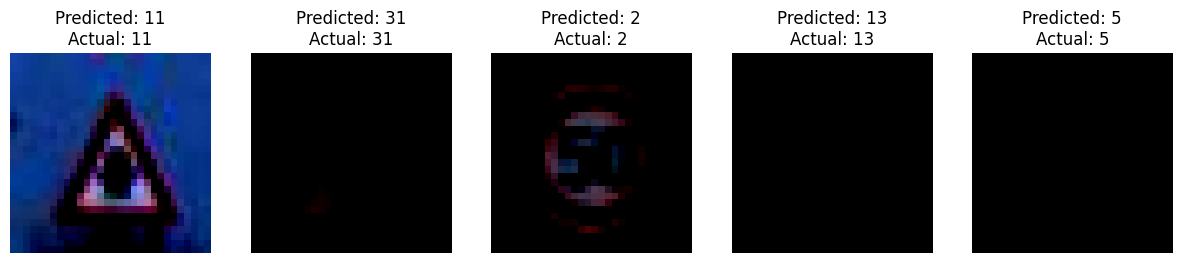

In [19]:
# Visualize some test results
visualize_predictions(model, device, test_loader)

In [20]:
# Assuming 'model' is your pre-trained FashionMNIST model
model.eval()  # Ensure the model is in evaluation mode

# Move your model to CPU (quantization is typically done for CPU inference)
model.to('cpu')

# Apply dynamic quantization
# Note: Changing dtype to torch.qint8 for quantization, which is a common practice
quantized_model = quantize_dynamic(
    model, 
    {torch.nn.Linear},  # Specify the layer types to quantize
    dtype=torch.qint8  # Use qint8 for quantizing the weights
)

In [24]:
# Evaluate the model on the test dataset
evaluate_model(quantized_model, 'cpu', test_loader)

Test set: Average loss: 0.0670, Accuracy: 7726/7842 (99%)


In [25]:
# Saves the final trained model's state dictionary. This file can be used later for further use or deployment.
torch.save(quantized_model.state_dict(), quantized_model_path)

In [26]:
# Get the size of the model
model_size = os.path.getsize(quantized_model_path)

# Convert size to more readable format (e.g., in MB)
model_size_mb = model_size / (1024 * 1024)

print(f"Quantized Model size: {model_size} bytes, or {model_size_mb:.2f} MB")

Quantized Model size: 490018 bytes, or 0.47 MB


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


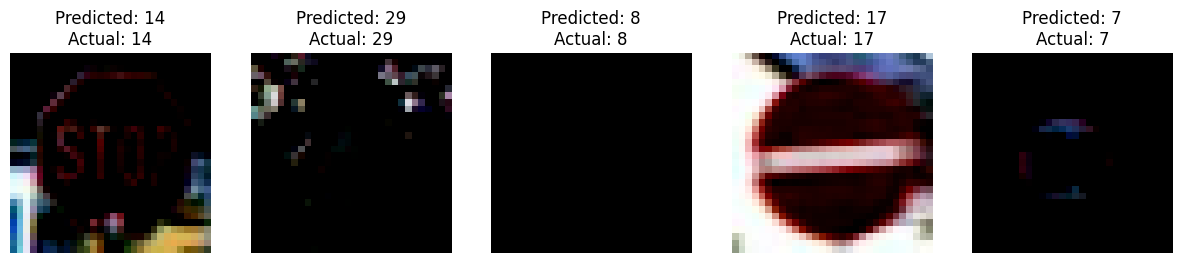

In [27]:
# Visualize some test results
visualize_predictions(model, 'cpu', test_loader)